### **Introduction**
!['EDA Boston Airbnb data](images/thumbnail.webp)

This analysis explores key trends and insights from Airbnb rental data in Boston, focusing on factors that influence rental performance and pricing strategies. Through exploratory data analysis (EDA) using Tableau Public, we aim to answer critical questions, such as the relationship between the number of bedrooms and rental prices, the gap between desired and actual prices, and seasonal variations in listing availability. By uncovering these insights, we provide practical recommendations for optimizing rental strategies on Airbnb, helping property owners and renters make data-driven decisions to maximize occupancy and revenue.

### **Boston Airbnb – Data Modeling**
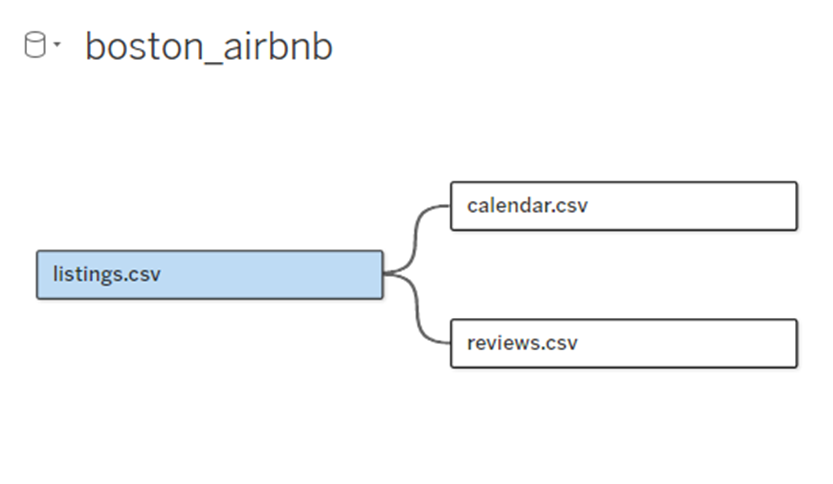

For those looking to rent homes or lease them on Airbnb, determining reasonable rental prices can be challenging. Here are some key questions to address:


1. **What is the relationship between the number of bedrooms and rental prices?**
2. **How do base prices compare with adjusted prices?**
3. **Which months of the year have the highest availability of listings?**


### **Install libraties**

In [1]:
# pip install
!pip install -r requirements.txt


## **Exploratory Data Analysis**

### Prepare data

In [2]:
# Import libraties
import pandas as pd
import numpy as np
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go


# Load data
listings = pd.read_csv('./data/listings.csv')
calendar = pd.read_csv('./data/calendar.csv')

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access


#### Dataset Overview

From the above it is clear we have **3,585 rows and 95 columns** in the dataset.

***df columns***:

1. **id**: Unique identifier for the listing.
2. **listing_url**: URL of the listing.
3. **scrape_id**: Identifier for the scraping session.
4. **last_scraped**: Date when the data was last scraped.
5. **name**: Name of the listing.
6. **summary**: Short description of the listing.
7. **space**: Additional information about the space provided.
8. **description**: Full description of the listing.
9. **experiences_offered**: Type of experiences offered by the listing (default: "none").
10. **neighborhood_overview**: Overview of the neighborhood.
11. **notes**: Additional notes provided by the host.
12. **transit**: Information about transportation options near the listing.
13. **access**: Details about guest access to the property.
14. **interaction**: Information on host-guest interaction.
15. **house_rules**: House rules for the listing.
16. **thumbnail_url**: URL for the listing's thumbnail image.
17. **medium_url**: Medium-sized image URL for the listing.
18. **picture_url**: Main picture URL for the listing.
19. **xl_picture_url**: Extra-large image URL for the listing.
20. **host_id**: Unique identifier for the host.
21. **host_url**: URL to the host's profile.
22. **host_name**: Name of the host.
23. **host_since**: Date when the host joined the platform.
24. **host_location**: Location of the host.
25. **host_about**: Description provided by the host.
26. **host_response_time**: Time taken by the host to respond to inquiries.
27. **host_response_rate**: Percentage of inquiries the host responds to.
28. **host_acceptance_rate**: Percentage of booking requests the host accepts.
29. **host_is_superhost**: Whether the host is a "superhost."
30. **host_thumbnail_url**: Thumbnail URL of the host's profile picture.
31. **host_picture_url**: Main picture URL of the host's profile.
32. **host_neighbourhood**: Neighborhood where the host lives.
33. **host_listings_count**: Number of listings managed by the host.
34. **host_total_listings_count**: Total number of listings the host manages.
35. **host_verifications**: Verification methods of the host.
36. **host_has_profile_pic**: Whether the host has a profile picture.
37. **host_identity_verified**: Whether the host's identity is verified.
38. **street**: Street address of the listing.
39. **neighbourhood**: Neighborhood where the listing is located.
40. **neighbourhood_cleansed**: Official neighborhood name used by Airbnb.
41. **neighbourhood_group_cleansed**: Empty column, can be removed.
42. **city**: City where the listing is located.
43. **state**: State where the listing is located.
44. **zipcode**: ZIP/postal code of the listing.
45. **market**: Market segment of the listing.
46. **smart_location**: Combined city and neighborhood information.
47. **country_code**: ISO country code.
48. **country**: Country where the listing is located.
49. **latitude**: Latitude of the listing location.
50. **longitude**: Longitude of the listing location.
51. **is_location_exact**: Whether the location provided is exact.
52. **property_type**: Type of property (e.g., apartment, house).
53. **room_type**: Type of room offered (e.g., entire home, private room).
54. **accommodates**: Number of people the listing can accommodate.
55. **bathrooms**: Number of bathrooms in the listing.
56. **bedrooms**: Number of bedrooms in the listing.
57. **beds**: Number of beds in the listing.
58. **bed_type**: Type of beds provided.
59. **amenities**: List of amenities available at the listing.
60. **square_feet**: Square footage of the listing (mostly missing).
61. **price**: Price per night for the listing.
62. **weekly_price**: Price for a week (many missing values).
63. **monthly_price**: Price for a month (many missing values).
64. **security_deposit**: Security deposit amount (many missing values).
65. **cleaning_fee**: Cleaning fee (missing in some listings).
66. **guests_included**: Number of guests included in the base price.
67. **extra_people**: Fee for additional guests.
68. **minimum_nights**: Minimum number of nights for booking.
69. **maximum_nights**: Maximum number of nights for booking.
70. **calendar_updated**: Frequency of calendar updates.
71. **has_availability**: Empty column, can be removed.
72. **availability_30**: Number of available nights in the next 30 days.
73. **availability_60**: Number of available nights in the next 60 days.
74. **availability_90**: Number of available nights in the next 90 days.
75. **availability_365**: Number of available nights in the next 365 days.
76. **calendar_last_scraped**: Last calendar scraping date.
77. **number_of_reviews**: Total number of reviews for the listing.
78. **first_review**: Date of the first review.
79. **last_review**: Date of the last review.
80. **review_scores_rating**: Overall rating score.
81. **review_scores_accuracy**: Accuracy rating score.
82. **review_scores_cleanliness**: Cleanliness rating score.
83. **review_scores_checkin**: Check-in rating score.
84. **review_scores_communication**: Communication rating score.
85. **review_scores_location**: Location rating score.
86. **review_scores_value**: Value-for-money rating score.
87. **requires_license**: Whether a license is required.
88. **license**: Empty column, can be removed.
89. **jurisdiction_names**: Empty column, can be removed.
90. **instant_bookable**: Whether the listing can be booked instantly.
91. **cancellation_policy**: Cancellation policy of the listing.
92. **require_guest_profile_picture**: Whether a guest profile picture is required.
93. **require_guest_phone_verification**: Whether guest phone verification is required.
94. **calculated_host_listings_count**: Number of active listings for the host.
95. **reviews_per_month**: Average number of reviews per month.


In [5]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


From the above, it is clear we have **1,308,890 rows** and **4 columns** in the dataset.

- **listing_id**: This is the unique identifier for each listing.
- **date**: Represents the specific date corresponding to the listing's availability.
- **available**: Indicates whether the listing is available for the specified date (e.g., "t": True or "f": False).
- **price**: The price of the listing for the specified date. Many entries have missing values for this column.

### Cleaning data

Before we proceed with our analysis, we need to clean the data. We will handle missing values, duplicates, and outliers.

In [7]:
# Check duplicate rows in listings data
duplicate_rows = listings[listings.duplicated()]
print('Number of duplicate rows:', duplicate_rows.shape[0])

Number of duplicate rows: 0


In [8]:
# Check duplicate rows in calendar data
duplicate_rows = calendar[calendar.duplicated()]
print('Number of duplicate rows:', duplicate_rows.shape[0])
# Drop duplicate rows in calendar data
calendar.drop_duplicates(inplace=True)
print("Calendar shape after removing duplicates:", calendar.shape)

Number of duplicate rows: 365
Calendar shape after removing duplicates: (1308525, 4)


Define the columns of interest for the analysis

In [9]:
# Define the columns of interest for the analysis
interesting_columns = ['id', 'bedrooms', 'price']
# Select the specified columns from the 'listings' dataframe
listings[interesting_columns].info()
# Create a new dataframe containing only the selected columns
interest_listings = listings[interesting_columns].copy()
# Print the shape of the new dataframe
print('Interesting shares:', interest_listings.shape)
# Drop any rows with missing values in the 'interest_listings' dataframe
interest_listings = interest_listings.dropna()
# Print the shape of the updated 'interest_listings' dataframe
print('Interesting shares after cleaning:', interest_listings.shape)
# Convert the 'price' column to float by removing dollar signs and commas
interest_listings['price'] = interest_listings['price'].apply(
    lambda x: float(x.replace('$', '').replace(',', ''))
    )
# Display the first few rows of the updated 'interest_listings' dataframe
interest_listings.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        3585 non-null   int64  
 1   bedrooms  3575 non-null   float64
 2   price     3585 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 84.1+ KB
Interesting shares: (3585, 3)
Interesting shares after cleaning: (3575, 3)


,id,bedrooms,price
0,12147973,2.0,250.0
1,3075044,1.0,65.0
2,6976,1.0,65.0
3,1436513,1.0,75.0
4,7651065,1.0,79.0


In [10]:
# Filter rows where 'available' is 't' and create a copy
interesting_calendar = calendar[calendar['available'] == 't'].copy()

# Drop any rows with missing values (create a new dataframe)
interesting_calendar = interesting_calendar.dropna()

# Convert the 'price' column to float by removing dollar signs and commas
interesting_calendar['price'] = interesting_calendar['price'].apply(
    lambda x: float(x.replace('$', '').replace(',', ''))
    )

# Print the shape of the updated dataframe
print('Interesting calendar shares:', interesting_calendar.shape)

# Display the first few rows of the updated dataframe
interesting_calendar.head()


Interesting calendar shares: (642957, 4)


,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0


### **Question 1: What is the relationship between the number of bedrooms and rental prices?**
To answer this, we performed some preprocessing steps to exclude records without bedroom information. We then grouped the listings by the number of bedrooms, calculated their counts, and computed the average desired price for each group.

In [11]:
# Group by 'bedrooms'
group_by_bedrooms = interest_listings.groupby('bedrooms').agg(
    {
        'id': 'count',  # Count the number of listings
        'price': 'mean',  # Calculate the average
    }
).reset_index()
group_by_bedrooms.columns = ['bedrooms', 'count of listings', 'Avg Price']
group_by_bedrooms.head()

,bedrooms,count of listings,Avg Price
0,0.0,287,154.668990
1,1.0,2379,136.285834
2,2.0,693,258.753247
3,3.0,155,316.419355
4,4.0,45,389.400000


In [12]:
def create_bedrooms_price_chart(group_by_bedrooms):
    """
    Create a combined bar and line chart showing the relationship between
    the number of bedrooms, count of listings, and average price.

    Parameters:
    group_by_bedrooms (pandas.DataFrame): A DataFrame containing grouped data
        with columns 'bedrooms', 'count of listings', and 'Avg Price'.

    Returns:
    plotly.graph_objs._figure.Figure: A Plotly figure object containing the combined chart.

    The function creates a bar chart for the count of listings and a line chart
    for the average price, both plotted against the number of bedrooms. The
    resulting chart provides a visual representation of how the number of
    bedrooms relates to both the frequency of listings and their average price.
    """
    # Create a bar chart for "count of listings" with legend
    bar_chart = px.bar(
        group_by_bedrooms,
        x="bedrooms",
        y="count of listings",
        title="Bedrooms, Count of Listings, and Average Price",
        text="count of listings",
        labels={"count of listings": "Count of Listings"},
    )

    # Update the bar chart to show legend
    bar_chart.update_traces(
        showlegend=True,
        name="Count of Listings",
    )

    # Create a line chart for "Avg Price" with values
    line_chart = px.line(
        group_by_bedrooms,
        x="bedrooms",
        y="Avg Price",
    ).update_traces(
        showlegend=True,
        name="Avg Price",
        yaxis="y2",
        line=dict(color="red", width=3),
        text=group_by_bedrooms["Avg Price"],
        texttemplate="$%{text:.0f}",
        textposition="top center",
        mode="lines+markers+text",
        marker=dict(
            color="red",
            size=8,
            symbol="circle",
        ),
    )

    # Combine the bar chart and line chart
    fig = bar_chart.add_traces(line_chart.data)

    # Update the layout to add the secondary y-axis and customize axes titles
    fig.update_layout(
        yaxis2=dict(
            title="Average Price",
            side="right",
            overlaying="y",
        ),
        xaxis=dict(title="Number of Bedrooms"),
        yaxis=dict(title="Count of Listings"),
    )

    return fig


fig = create_bedrooms_price_chart(group_by_bedrooms)
# fig.show()
fig.write_image("./images/group_by_bedrooms.png")

!["Bedrooms, Count of Listings, and Average Price"](images/group_by_bedrooms.png)


**Observations from the chart**:

* *Most registered listings are one-bedroom apartments, with an average rental price of approximately $140.*
  
* *Apartments with more than two bedrooms are generally priced higher but are less commonly listed.*
* *Two-bedroom apartments have a higher average price, around $260.*

### **Question 2: How do base prices compare with adjusted prices?**
To address this, we utilized two datasets, listing and calendar, to calculate both the base and adjusted prices for each listing ID. Then, we grouped the data by the number of bedrooms in each listing.

In [13]:
# Group by 'bedrooms' and calculate count listings and average of price for each group
group_by_listing = interesting_calendar.groupby('listing_id').agg(
    {
        'price': 'mean',  # Calculate the average
    }
).reset_index()
group_by_listing.columns = ['listing_id', 'Avg Adjusted price']
group_by_listing.head()

,listing_id,Avg Adjusted price
0,3353,35.204819
1,5506,147.267442
2,6695,197.407407
3,6976,65.000000
4,8792,154.000000


In [14]:
calendar_and_listings = pd.merge(
    group_by_listing,
    interest_listings,
    left_on='listing_id',
    right_on='id',
    how='inner'
    )
calendar_and_listings.head()

,listing_id,Avg Adjusted price,id,bedrooms,price
0,3353,35.204819,3353,1.0,40.0
1,5506,147.267442,5506,1.0,145.0
2,6695,197.407407,6695,1.0,195.0
3,6976,65.000000,6976,1.0,65.0
4,8792,154.000000,8792,1.0,154.0


In [15]:
# Group by 'bedrooms' and calculate count listings and average of price for each group
calendar_and_listings_group_by_bedrooms = (
    calendar_and_listings.groupby('bedrooms').agg(
        {
            'Avg Adjusted price': 'mean',  # Calculate the average
            'price': 'mean'  # Calculate the average
        }
    )
    .reset_index()
)

calendar_and_listings_group_by_bedrooms.columns = [
    'Bedrooms', 'Avg Adjusted Price', 'Avg Base Price'
]

calendar_and_listings_group_by_bedrooms['Avg Diff Price'] = (
    100 * (
        calendar_and_listings_group_by_bedrooms['Avg Adjusted Price']
        - calendar_and_listings_group_by_bedrooms['Avg Base Price']
    )
    / calendar_and_listings_group_by_bedrooms['Avg Base Price']
)

calendar_and_listings_group_by_bedrooms.head()


,Bedrooms,Avg Adjusted Price,Avg Base Price,Avg Diff Price
0,0.0,165.971553,155.301205,6.870744
1,1.0,148.766794,137.345829,8.315480
2,2.0,306.930686,259.881625,18.104035
3,3.0,368.916480,319.842105,15.343313
4,4.0,422.418168,389.125000,8.555906


In [16]:

def create_combined_chart(data):
    """
    Create a combined chart with a bar chart and two line charts, visualizing
    different metrics related to bedrooms and prices.

    Args:
        data (DataFrame): The input DataFrame containing the following columns:
            - "Bedrooms": Number of bedrooms.
            - "Avg Diff Price": Average price difference to display on the bar chart.
            - "Avg Adjusted Price": Average adjusted price to display on the first line chart.
            - "Avg Base Price": Average base price to display on the second line chart.

    Returns:
        plotly.graph_objs._figure.Figure: A combined Plotly figure with the bar chart and two line charts.
    """
    # Create the bar chart
    bar_chart = px.bar(
        data,
        x="Bedrooms",
        y="Avg Diff Price",
        title="Bedrooms and Avg Price",
        text="Avg Diff Price",  # Display the value on each bar
        labels={"Avg Diff Price": "Avg Diff Price"},  # Label for legend
    )
    bar_chart.update_traces(
        showlegend=True,  # Enable legend for the bar chart
        name="Avg Diff Price",  # Custom legend name
        texttemplate="%{text:.2f}%",  # Format text with '%' symbol
    )

    # Create the first line chart for "Avg Adjusted Price"
    line_chart1 = px.line(
        data,
        x="Bedrooms",
        y="Avg Adjusted Price",
    ).update_traces(
        showlegend=True,
        name="Avg Adjusted Price",
        yaxis="y2",  # Associate this line with the secondary y-axis
        line=dict(color="red", width=3),
        text=data["Avg Adjusted Price"],
        texttemplate="$%{text:.2f}",
        textposition="top center",
        mode="lines+markers+text",
        marker=dict(color="red", size=8, symbol="circle"),
    )

    # Create the second line chart for "Avg Base Price"
    line_chart2 = px.line(
        data,
        x="Bedrooms",
        y="Avg Base Price",
    ).update_traces(
        showlegend=True,
        name="Avg Base Price",
        yaxis="y2",  # Associate this line with the secondary y-axis
        line=dict(color="blue", width=3),
        text=data["Avg Base Price"],
        texttemplate="$%{text:.2f}",
        textposition="top center",
        mode="lines+markers+text",
        marker=dict(color="blue", size=8, symbol="square"),
    )

    # Combine the bar chart and both line charts
    fig = bar_chart.add_traces(line_chart1.data + line_chart2.data)

    # Update the layout to add the secondary y-axis and customize axes titles
    fig.update_layout(
        yaxis2=dict(
            title="Price",
            side="right",
            overlaying="y",
        ),
        xaxis=dict(title="Number of Bedrooms"),
        yaxis=dict(title="Avg Diff Price"),
    )

    return fig


In [17]:
fig = create_combined_chart(calendar_and_listings_group_by_bedrooms)
# fig.show()
fig.write_image("./images/calendar_and_listings_group_by_bedrooms.png")

!['Bedrooms and Avg Price'](images/calendar_and_listings_group_by_bedrooms.png)




**Insights from the chart:**

* The difference between base and adjusted prices is significant for two-bedroom apartments, with a gap of approximately 18%.
* For studios or one-bedroom apartments, the discrepancy is minimal.

### **Question 3: Which months of the year have the highest availability of listings?**

To answer this, we used data from calendar.csv. The data was grouped by months, and the percentage of availability values in the available column was calculated.



In [18]:
# Convert the 'date' column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract the month from the 'date' column
calendar['month'] = calendar['date'].dt.month

# Group by month and calculate the percentage of True/False values in the 'available' column
df_monthly = (
    calendar
    .groupby('month')['available']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

# Convert to percentage
df_monthly = df_monthly * 100
df_monthly = df_monthly.reset_index()


df_monthly.columns = ['month', 'percent_f', 'percent_t']
# Print the result
print(df_monthly)

    month  percent_f  percent_t
0       1  43.149323  56.850677
1       2  43.405061  56.594939
2       3  50.347775  49.652225
3       4  52.225012  47.774988
4       5  51.770369  48.229631
5       6  50.970711  49.029289
6       7  50.543933  49.456067
7       8  50.005849  49.994151
8       9  68.960483  31.039517
9      10  58.326360  41.673640
10     11  45.273826  54.726174
11     12  45.118100  54.881900


In [19]:

def create_stacked_bar_chart(data):
    """
    Create a stacked bar chart to visualize the percentage of 'True' and 'False'
    values for each month.

    Args:
        data (DataFrame): The input DataFrame containing the following columns:
            - "month": The months to be displayed on the x-axis.
            - "percent_t": The percentage of 'True' values for each month.
            - "percent_f": The percentage of 'False' values for each month.

    Returns:
        plotly.graph_objs._figure.Figure: A stacked bar chart visualizing the data.
    """
    # Create the stacked bar chart
    fig = go.Figure(data=[
        go.Bar(
            x=data['month'],  # X-axis represents the months
            y=data['percent_t'],  # Y-axis represents the percentage of 'True'
            name='True',  # Label for the 'True' category
            text=[f'<br>{p:.1f}%' for p in data['percent_t']],
            textposition='inside',  # Position the text inside the bars
            texttemplate='%{text}',
            hoverinfo='y+text'  # Show the value and text on hover
        ),
        go.Bar(
            x=data['month'],  # X-axis represents the months
            y=data['percent_f'],  # Y-axis represents the percentage of 'False'
            name='False',  # Label for the 'False' category
            text=[f'<br>{p:.1f}%' for p in data['percent_f']],
            textposition='inside',  # Position the text inside the bars
            texttemplate='%{text}',
            hoverinfo='y+text'  # Show the value and text on hover
        )
    ])

    # Update layout for the stacked bar chart
    fig.update_layout(
        barmode='stack',  # Stack the bars to create a stacked bar chart
        title='Available by Month',  # Title of the chart
        xaxis_title='Month',  # Label for the x-axis
        yaxis_title='Percent',  # Label for the y-axis
        xaxis=dict(
            tickangle=45,
            showticklabels=True,  # Ensure the x-axis tick labels are visible
            tickmode='array',  # Use all x-axis values as tick marks
            tickvals=data['month']
        )
    )

    return fig


fig = create_stacked_bar_chart(df_monthly)
fig.write_image("./images/Available_by_Month_chart.png")


![Available by Month](images/Available_by_Month_chart.png)



**Insights from the chart:**


* September and October attract the highest number of renters, with more than 59% of days being occupied.
* From November to February, rental activity is at its lowest.

### **Conclusion**

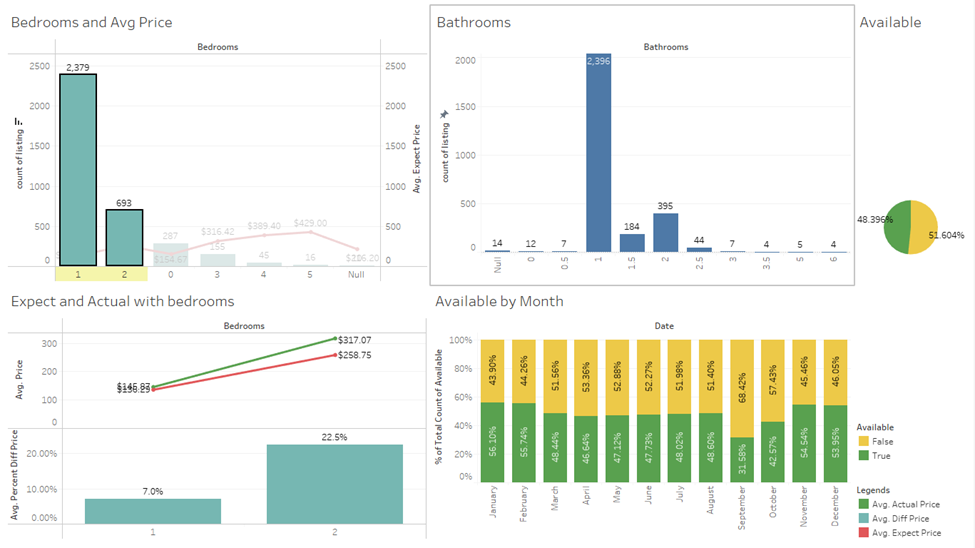

For subleasing or renting out properties on Airbnb, it is recommended to:

* Focus on one-bedroom or two-bedroom apartments, as they account for more than 52% of rented days annually.
* Set rental prices in the range of 150  to 350 USD for optimal occupancy.


**Explore the Visualizations**

For a deeper understanding and interactive exploration of the data, check out the full analysis on [Tableau Public](https://public.tableau.com/views/boston_airbnb/Story1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link). This provides detailed visual insights into rental trends and helps refine your strategies further.